In [2]:
import boto3
import os
import pandas as pd

bucket_name = "nexttrendco"
s3 = boto3.client("s3", region_name="us-east-1")  
local_folder_path = "/home/sagemaker-user/raw-data/"

In [3]:
# Ensure local directory exists
if os.path.exists(local_folder_path):
    print("Directory exists:", local_folder_path)
else:
    print("Directory was not created.")

Directory exists: /home/sagemaker-user/raw-data/


In [4]:
# Initialize S3 client with correct region
s3 = boto3.client("s3", region_name="us-east-1")

In [5]:
# List all files in the S3 bucket
response = s3.list_objects_v2(Bucket=bucket_name)

if "Contents" in response:
    print("\n Files found in S3 bucket:")
    for obj in response["Contents"]:
        print(obj["Key"])  # Print full file paths
else:
    print("\n No files found in S3. Please check your upload.")



 Files found in S3 bucket:
favorita/holidays_events.csv
favorita/items.csv
favorita/oil.csv
favorita/stores.csv
favorita/test.csv
favorita/train.csv
favorita/transactions.csv
rossman/store.csv
rossman/test.csv
rossman/train.csv
walmart/features.csv
walmart/stores.csv
walmart/test.csv
walmart/train.csv


In [6]:
if "Contents" in response:
    for obj in response["Contents"]:
        s3_key = obj["Key"]  # Full path in S3
        file_name = s3_key.split("/")[-1]  # Extract file name
        local_file_path = os.path.join(local_folder_path, file_name)

        # Download only if it's a file (not an empty folder)
        if not s3_key.endswith("/"):
            s3.download_file(bucket_name, s3_key, local_file_path)
            print(f"Downloaded {file_name} from S3 to {local_file_path}")
else:
    print("No files found in S3.")

Downloaded holidays_events.csv from S3 to /home/sagemaker-user/raw-data/holidays_events.csv
Downloaded items.csv from S3 to /home/sagemaker-user/raw-data/items.csv
Downloaded oil.csv from S3 to /home/sagemaker-user/raw-data/oil.csv
Downloaded stores.csv from S3 to /home/sagemaker-user/raw-data/stores.csv
Downloaded test.csv from S3 to /home/sagemaker-user/raw-data/test.csv
Downloaded train.csv from S3 to /home/sagemaker-user/raw-data/train.csv
Downloaded transactions.csv from S3 to /home/sagemaker-user/raw-data/transactions.csv
Downloaded store.csv from S3 to /home/sagemaker-user/raw-data/store.csv
Downloaded test.csv from S3 to /home/sagemaker-user/raw-data/test.csv
Downloaded train.csv from S3 to /home/sagemaker-user/raw-data/train.csv
Downloaded features.csv from S3 to /home/sagemaker-user/raw-data/features.csv
Downloaded stores.csv from S3 to /home/sagemaker-user/raw-data/stores.csv
Downloaded test.csv from S3 to /home/sagemaker-user/raw-data/test.csv
Downloaded train.csv from S3 t

In [7]:
# Verify downloaded 
downloaded_files = os.listdir(local_folder_path)
if downloaded_files:
    print("\nFiles available in SageMaker:")
    print(downloaded_files)
else:
    print("\nNo files found in SageMaker. Check the download process.")



Files available in SageMaker:
['holidays_events.csv', 'items.csv', 'oil.csv', 'stores.csv', 'transactions.csv', 'store.csv', 'features.csv', 'test.csv', 'train.csv']


In [8]:
# Print headers
for file_name in downloaded_files:
    if file_name.endswith(".csv"):
        file_path = os.path.join(local_folder_path, file_name)
        df = pd.read_csv(file_path)

        print(f"\nFile: {file_name}")
        print(df.head())



File: holidays_events.csv
         date     type    locale locale_name                    description  \
0  2012-03-02  Holiday     Local       Manta             Fundacion de Manta   
1  2012-04-01  Holiday  Regional    Cotopaxi  Provincializacion de Cotopaxi   
2  2012-04-12  Holiday     Local      Cuenca            Fundacion de Cuenca   
3  2012-04-14  Holiday     Local    Libertad      Cantonizacion de Libertad   
4  2012-04-21  Holiday     Local    Riobamba      Cantonizacion de Riobamba   

   transferred  
0        False  
1        False  
2        False  
3        False  
4        False  

File: items.csv
   item_nbr        family  class  perishable
0     96995     GROCERY I   1093           0
1     99197     GROCERY I   1067           0
2    103501      CLEANING   3008           0
3    103520     GROCERY I   1028           0
4    103665  BREAD/BAKERY   2712           1

File: oil.csv
         date  dcoilwtico
0  2013-01-01         NaN
1  2013-01-02       93.14
2  2013-01-03   

In [9]:
import pandas as pd

file_path = "/home/sagemaker-user/raw-data/stores.csv" 
df = pd.read_csv(file_path)

print("Columns:", df.columns)
print(df.info())
print(df.describe())
print(df.head())

Columns: Index(['Store', 'Type', 'Size'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB
None
           Store           Size
count  45.000000      45.000000
mean   23.000000  130287.600000
std    13.133926   63825.271991
min     1.000000   34875.000000
25%    12.000000   70713.000000
50%    23.000000  126512.000000
75%    34.000000  202307.000000
max    45.000000  219622.000000
   Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875


In [10]:
print(df.isnull().sum())

Store    0
Type     0
Size     0
dtype: int64


In [11]:
print(df[['Store', 'Type', 'Size']].value_counts())

Store  Type  Size  
1      A     151315    1
2      A     202307    1
3      B     37392     1
4      A     205863    1
5      B     34875     1
6      A     202505    1
7      B     70713     1
8      A     155078    1
9      B     125833    1
10     B     126512    1
11     A     207499    1
12     B     112238    1
13     A     219622    1
14     A     200898    1
15     B     123737    1
16     B     57197     1
17     B     93188     1
18     B     120653    1
19     A     203819    1
20     A     203742    1
21     B     140167    1
22     B     119557    1
23     B     114533    1
24     A     203819    1
25     B     128107    1
26     A     152513    1
27     A     204184    1
28     A     206302    1
29     B     93638     1
30     C     42988     1
31     A     203750    1
32     A     203007    1
33     A     39690     1
34     A     158114    1
35     B     103681    1
36     A     39910     1
37     C     39910     1
38     C     39690     1
39     A     184109    1
40   

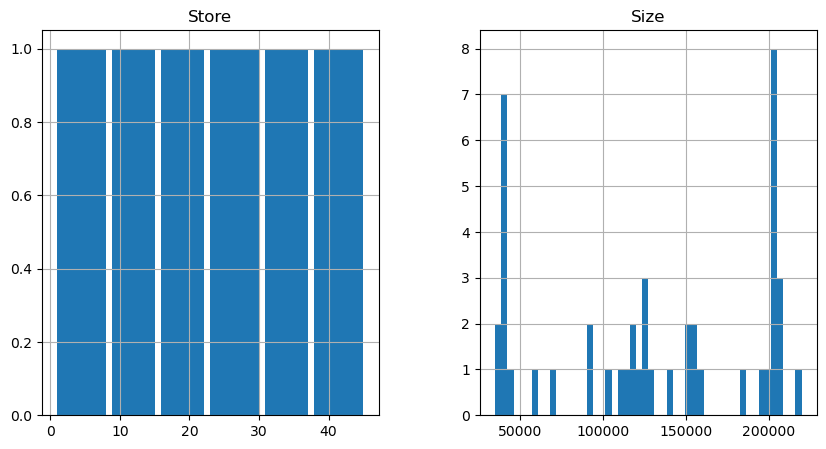

In [12]:
import matplotlib.pyplot as plt

df[['Store', 'Size']].hist(bins=50, figsize=(10, 5))  # Excluding 'Type' if it's categorical
plt.show()